In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset=pd.read_csv('Train_data.csv')

**Function which provides information about the "Null status" and the data type of each feature. This helps the preprocessing of the features having null values and also to do label encoding for categorical attributes**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25192 entries, 0 to 25191
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     25192 non-null  int64  
 1   protocol_type                25192 non-null  object 
 2   service                      25192 non-null  object 
 3   flag                         25192 non-null  object 
 4   src_bytes                    25192 non-null  int64  
 5   dst_bytes                    25192 non-null  int64  
 6   land                         25192 non-null  int64  
 7   wrong_fragment               25192 non-null  int64  
 8   urgent                       25192 non-null  int64  
 9   hot                          25192 non-null  int64  
 10  num_failed_logins            25192 non-null  int64  
 11  logged_in                    25192 non-null  int64  
 12  num_compromised              25192 non-null  int64  
 13  root_shell      

In [ ]:
dataset.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal
1,0,udp,other,SF,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal
2,0,tcp,private,S0,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,anomaly
3,0,tcp,http,SF,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal
4,0,tcp,http,SF,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal


In [ ]:
dataset.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,25192.000000,2.519200e+04,2.519200e+04,25192.000000,25192.000000,25192.00000,25192.000000,25192.000000,25192.000000,25192.000000,...,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000,25192.000000
mean,305.054104,2.433063e+04,3.491847e+03,0.000079,0.023738,0.00004,0.198039,0.001191,0.394768,0.227850,...,182.532074,115.063036,0.519791,0.082539,0.147453,0.031844,0.285800,0.279846,0.117800,0.118769
std,2686.555640,2.410805e+06,8.883072e+04,0.008910,0.260221,0.00630,2.154202,0.045418,0.488811,10.417352,...,98.993895,110.646850,0.448944,0.187191,0.308367,0.110575,0.445316,0.446075,0.305869,0.317333
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,84.000000,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,...,255.000000,61.000000,0.510000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.790000e+02,5.302500e+02,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,0.000000,...,255.000000,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000
max,42862.000000,3.817091e+08,5.151385e+06,1.000000,3.000000,1.00000,77.000000,4.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**Visualizing the data through a heatmap if any null entries exist in the dataset , as if it does preprocessing needs to be applied to replace the missing data**

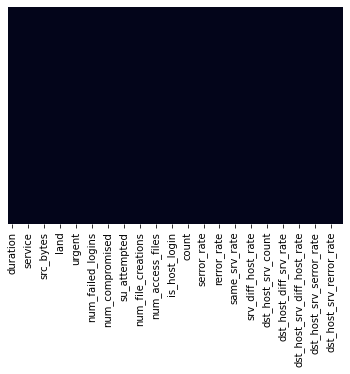

In [ ]:
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False)

In [ ]:
features=dataset.iloc[:,:-1].values
label=dataset.iloc[:,-1].values
print(features[:,-1])

[0.0 0.0 0.0 ... 1.0 0.0 0.0]


In [ ]:
# Label encoding data for categorical features
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for x in range(3):
  features[:,x+1]=le.fit_transform(features[:,x+1])
#label encoding for the final class attribute (Normal or anamoly)
label=le.fit_transform(label)
print(features[:,-1])

[0.0 0.0 0.0 ... 1.0 0.0 0.0]


In [ ]:
# Splitting the dataset into training and testing , 20% data will be used to test the model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features ,label, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

#swap the duration field for convenient computation ahead , as a consistent list of numerical attributes are grouped together
features[0],features[3]=features[3],features[0]
#Scaling all the numerical features in the training and test set
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:])
X_test[:, 3:] = sc.transform(X_test[:, 3:])

In [ ]:
#Doing dimensionality reduction using PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

**Defining metric terms**

In [ ]:
terms=['Precision','recall','F-score','binary_accuracy']

**DECISION TREE**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'gini', random_state = 0)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
cm = confusion_matrix(y_test, y_pred)

metrics=[cm,precision_score(y_test, y_pred),recall_score(y_test, y_pred),f1_score(y_test, y_pred),accuracy_score(y_test, y_pred)]

for x in range(1,len(metrics)):
  print(terms[x],": ",metrics[x]*100)

98.86238532110092  99.29966826391448  99.0805443177639  99.00773963087914  

**RANDOM FOREST CLASSIFICATION**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(n_estimators=100,criterion='gini')
rf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred2=rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)

metrics2=[cm,precision_score(y_test, y_pred2),recall_score(y_test, y_pred2),f1_score(y_test, y_pred2),accuracy_score(y_test, y_pred2)]

for x in range(1,len(metrics2)):
  print(terms[x],": ",metrics2[x]*100)

99.30198383541513  99.63140434942868  99.46642134314627  99.4244889859099  

**ANN**

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

model=keras.Sequential(
    [
    layers.Dense(10, activation='relu', input_shape=[10]),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(10, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(1,activation='sigmoid')]
)
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['binary_accuracy']
)
model.fit(X_train,y_train,batch_size=256,epochs=100,verbose=0)

In [ ]:
y_pred3=model.predict(X_test)
for i in range(len(y_pred3)):
  if y_pred3[i]>=0.5:
    y_pred3[i]=1
  else:
    y_pred3[i]=0

metrics3=[cm,precision_score(y_test, y_pred3),recall_score(y_test, y_pred3),f1_score(y_test, y_pred3),accuracy_score(y_test, y_pred3)]

for x in range(1,len(metrics3)):
  print(terms[x],": ",metrics3[x]*100)

95.81844174410293  98.82049391817176  97.2963164579931  97.04306410001985  

**SVM**

In [ ]:
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train, y_train)

SVC(random_state=0)

In [ ]:
y_pred6=svm.predict(X_test)
metrics6=[cm,precision_score(y_test, y_pred6),recall_score(y_test, y_pred6),f1_score(y_test, y_pred6),accuracy_score(y_test, y_pred6)]

for x in range(1,len(metrics6)):
  print(terms[x],": ",metrics6[x]*100)

54.909900789633525  99.96314043494287  70.88342916884474  55.7848779519746  

**KNN**

In [ ]:
 from sklearn.neighbors import KNeighborsClassifier
 knn=KNeighborsClassifier(n_neighbors=5)
 knn.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred4=knn.predict(X_test)
metrics4=[cm,precision_score(y_test, y_pred4),recall_score(y_test, y_pred4),f1_score(y_test, y_pred4),accuracy_score(y_test, y_pred4)]

for x in range(1,len(metrics4)):
  print(terms[x],": ",metrics4[x]*100)

98.24881430134987  99.26280869885736  98.75320865419874  98.65052589799564  

**Naive Bayes**

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred5=nb.predict(X_test)
metrics5=[cm,precision_score(y_test, y_pred5),recall_score(y_test, y_pred5),f1_score(y_test, y_pred5),accuracy_score(y_test, y_pred5)]

for x in range(1,len(metrics5)):
  print(terms[x],": ",metrics5[x]*100)

92.71366679795196  86.7674161444895  89.64204112718966  89.20420718396507  

**VISUALIZATION OF PERFORMANCE OF ALGORITHMS**

In [ ]:
precision=[metrics6[1],metrics5[1],metrics4[1],metrics3[1],metrics2[1],metrics[1]]
recall=[metrics6[2],metrics5[2],metrics4[2],metrics3[2],metrics2[2],metrics[2]]
fscore=[metrics6[3],metrics5[3],metrics4[3],metrics3[3],metrics2[3],metrics[3]]
accuracy=[metrics6[4],metrics5[4],metrics4[4],metrics3[4],metrics2[4],metrics[4]]

precision=[x*100 for x in precision]
recall=[x*100 for x in recall]
fscore=[x*100 for x in fscore]
accuracy=[x*100 for x in accuracy]

**Comparison of Precision and binary_accuracy**

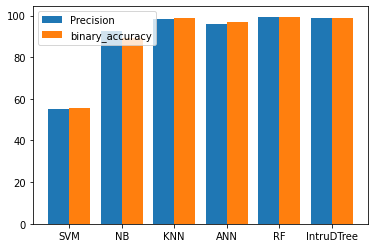

In [ ]:
models=['SVM','NB','KNN','ANN','RF','IntruDTree']
x_axis = np.arange(len(models))
plt.bar(x_axis -0.2, precision, width=0.4, label = 'Precision')
plt.bar(x_axis +0.2, accuracy, width=0.4, label = 'binary_accuracy')
plt.xticks(x_axis, models)
plt.legend()
plt.show()

**Comparison of recall and F-score**

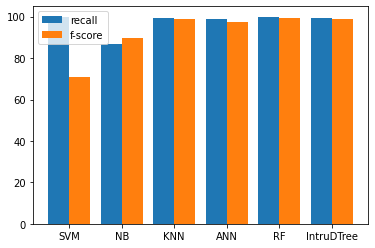

In [ ]:
plt.bar(x_axis -0.2, recall, width=0.4, label = 'recall')
plt.bar(x_axis +0.2, fscore, width=0.4, label = 'f-score')
plt.xticks(x_axis, models)
plt.legend()
plt.show()

CONCLUSION:

**The Random forest algorithm and the IntruDTree has the best performance to detect the service as Normal or Anomaly**